<a href="https://colab.research.google.com/github/DjengoFang/Financial-Engineering-Ruppert-Matteson-/blob/main/Lab6.5.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py
import seaborn as sns
import random

In [4]:
from fitter import Fitter

In [5]:
url = 'https://raw.githubusercontent.com/DjengoFang/Financial-Engineering-Ruppert-Matteson-/main/datasets/bmwRet.csv'
data = pd.read_csv(url)
data.head(5)

,X.Y..m..d,BMW.RET
0,1973-01-02,0.047704
1,1973-01-03,0.007127
2,1973-01-04,0.008883
3,1973-01-05,-0.012441
4,1973-01-08,-0.003570


# Problem 1

Fitting 2 distributions: 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
nct,379.186764,294.068511,-17084.960103,inf,0.054845,1.650177e-16
t,382.453033,288.510715,-17040.969485,inf,0.055199,1.021187e-16


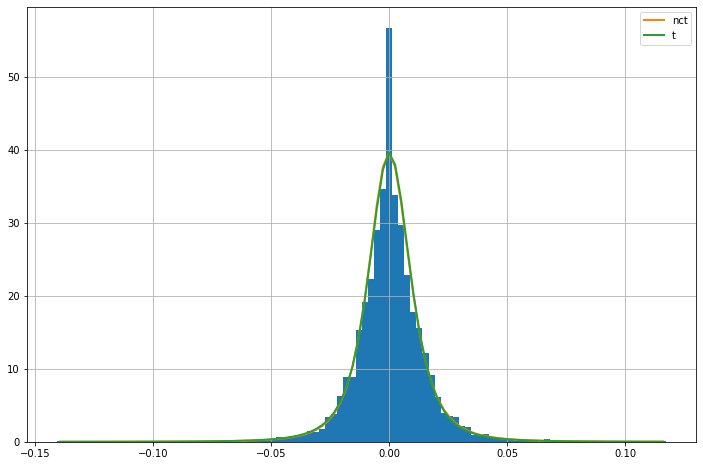

In [6]:
ret = data['BMW.RET'].values
plt.figure(figsize=(12, 8))
f = Fitter(ret, distributions=['nct', 't'])
f.fit()
f.summary()

In [7]:
f.get_best(method = 'sumsquare_error')

{'nct': {'df': 2.986837640800617,
  'nc': 0.09955443277687964,
  'loc': -0.0008771468528364075,
  'scale': 0.009255437077055706}}

In [8]:
stats.skew(ret)

-0.04582926883223743

In [9]:
stats.kurtosis(ret)

7.160895676188897

In [10]:
eval_points = np.arange(start=1, stop=ret.size+1)
eval_points = eval_points/(ret.size+1)
print(eval_points)

[1.62680983e-04 3.25361965e-04 4.88042948e-04 ... 9.99511957e-01
 9.99674638e-01 9.99837319e-01]


In [11]:
fit_ret = stats.nct.ppf(eval_points, df=2.986837640800617, nc=0.09955443277687964, loc=-0.0008771468528364075, scale=0.009255437077055706)

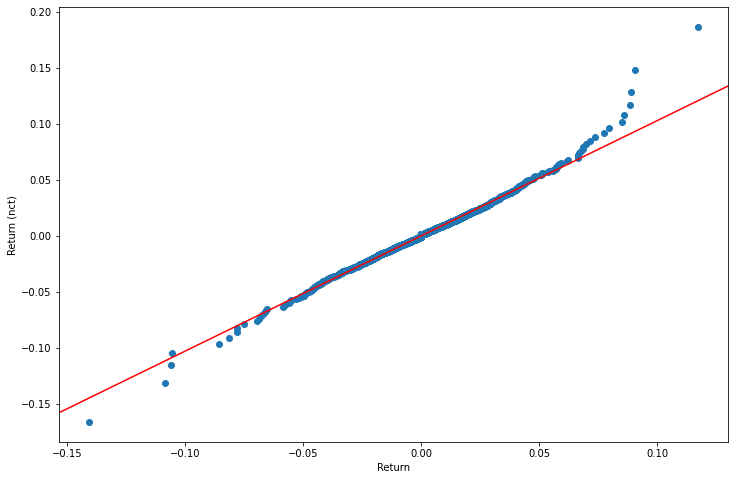

In [12]:
plt.figure(figsize=(12, 8))
plt.axline((np.quantile(ret, 0.25), np.quantile(fit_ret, 0.25)), (np.quantile(ret, 0.75), np.quantile(fit_ret, 0.75)), color="red")
plt.scatter(np.sort(ret), np.sort(fit_ret))
plt.xlabel('Return')
plt.ylabel('Return (nct)')
plt.show()

# Problem 2

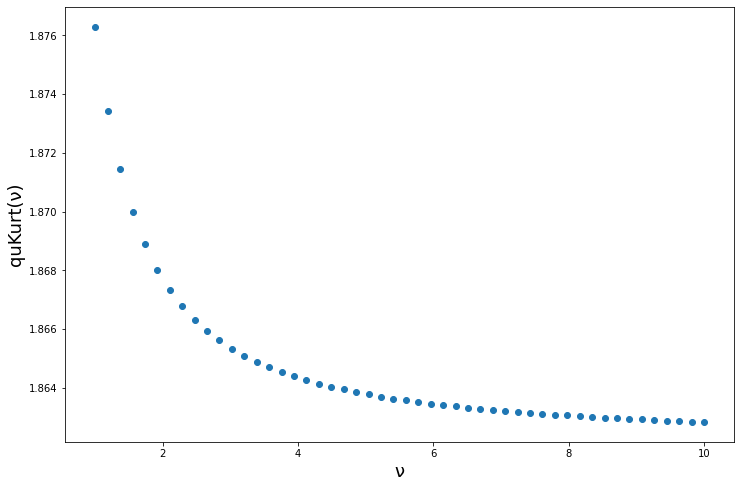

In [13]:
nu = np.linspace(start=1, stop=10, num=50)
p1 = 0.025
p2 = 0.25
numerator = stats.t.cdf(1-p1, df=nu) - stats.t.cdf(p1, df=nu)
denominator = stats.t.cdf(1-p2, df=nu) - stats.t.cdf(p2, df=nu)
plt.figure(figsize=(12, 8))
plt.scatter(nu, numerator/denominator)
plt.xlabel('ν', fontsize=18)
plt.ylabel('quKurt(ν)', fontsize=18)
plt.show()

# Problem 3

In [14]:
from sklearn.utils import resample

In [29]:
def quKurt(y, p1=0.025, p2=0.25):
  Q = np.quantile(y, [p1, p2, 1-p1, 1-p2])
  return (Q[2]-Q[0])/(Q[3]-Q[1])

In [16]:
nboot = 5000
ModelFree_kurt = []
ModelBased_kurt = []

In [17]:
n = ret.size
for i in range(nboot):
  samp_ModelFree = resample(ret)
  samp_ModelBased = stats.nct.rvs(df=2.986837640800617, nc=0.09955443277687964, loc=-0.0008771468528364075, scale=0.009255437077055706, size=n)
  ModelFree_kurt.append(quKurt(samp_ModelFree))
  ModelBased_kurt.append(quKurt(samp_ModelBased))

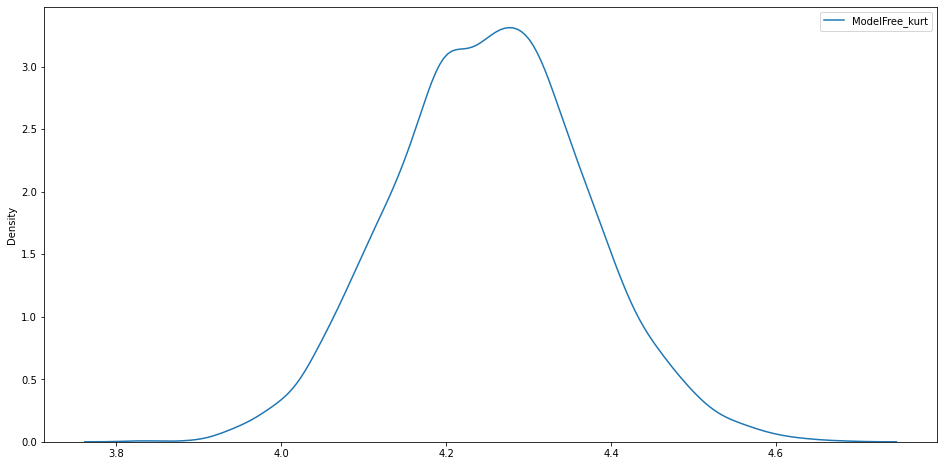

In [18]:
plt.figure(figsize=(16,8))
sns.kdeplot(ModelFree_kurt)
plt.legend(['ModelFree_kurt'])

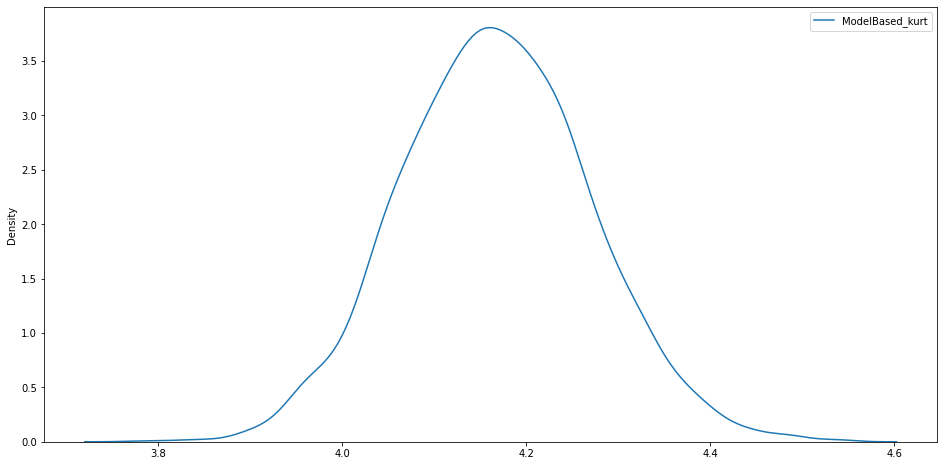

In [19]:
plt.figure(figsize=(16,8))
sns.kdeplot(ModelBased_kurt)
plt.legend(['ModelBased_kurt'])

<AxesSubplot: >

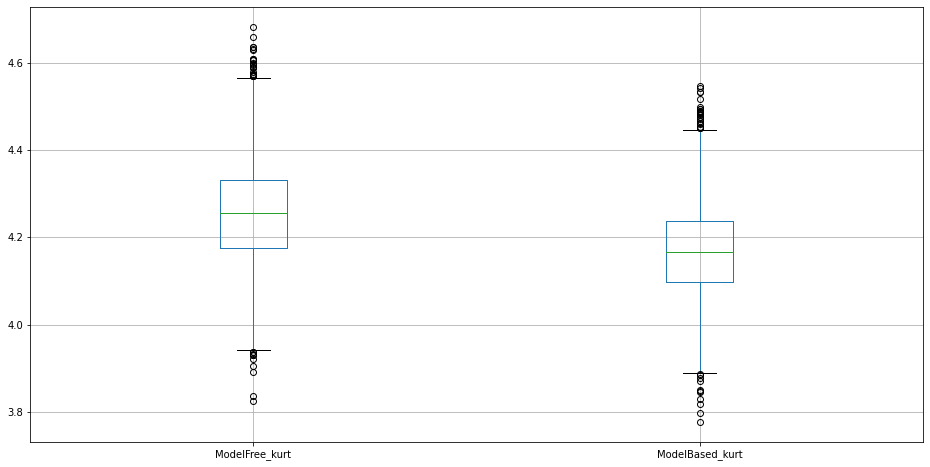

In [22]:
plt.figure(figsize=(16,8))
df = pd.DataFrame({"ModelFree_kurt": ModelFree_kurt, "ModelBased_kurt": ModelBased_kurt})
df.boxplot()

# Problem 4

In [23]:
np.quantile(ModelFree_kurt, [0.05, 0.95])

array([4.06158606, 4.44926937])

In [24]:
np.quantile(ModelBased_kurt, [0.05, 0.95])

array([4.00248176, 4.3364068 ])

# Problem 5

In [37]:
!pip install bootstrap_stat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 5.9 MB/s eta 0:00:00


In [38]:
from bootstrap_stat import bootstrap_stat as bp

In [39]:
def statistic(df):
  p1=0.025
  p2=0.25
  Q = np.quantile(df, [p1, p2, 1-p1, 1-p2])
  return (Q[2]-Q[0])/(Q[3]-Q[1])

In [41]:
dist = bp.EmpiricalDistribution(ret)
ci_low, ci_high = bp.bcanon_interval(dist, statistic, ret)
print(ci_low, ci_high)

4.11190650896012 4.474667436353005
